In [1]:
#General imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
import joblib
import time

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Machine Learning imports

# 1. Data Import & Aggregation

In [6]:
DATA_PATH = 'C:\\My Work\\Projects\\Machine Learning\\Walmart Sales Forecasting\\datasets\\'#local folder
#DATA_PATH = '/content/'

In [7]:
print('Loading data...')
print(os.listdir(DATA_PATH))

Loading data...
['features.csv', 'stores.csv', 'test.csv', 'train.csv']


In [8]:
FEATURE_PATH = DATA_PATH + 'features.csv'
STORES_PATH = DATA_PATH + 'stores.csv'
TRAIN_PATH = DATA_PATH + 'train.csv'
TEST_PATH = DATA_PATH + 'test.csv'

In [9]:
#Created variables for each dataset path is to make this portion less dependent.
#Even if I need to change or move the data to somewhere else, the effort will be minimal
#A better option would have been to create a config file for the same.

In [10]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)
features = pd.read_csv(FEATURE_PATH)
stores = pd.read_csv(STORES_PATH)

In [11]:
train.head(20)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [12]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [13]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [14]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

In [16]:
#merging the data

class DataMerger(BaseEstimator, TransformerMixin):
    def __init__(self,fpath = FEATURE_PATH, spath = STORES_PATH):
        self.fpath = fpath
        self.spath = spath
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        feature = pd.read_csv(self.fpath)
        store = pd.read_csv(self.spath)
        df = X.merge(feature, how = 'inner', on =['Store', 'Date', 'IsHoliday'])
        df = df.merge(store, how = 'inner', on =['Store'])
        return df

In [17]:
dataMerger = DataMerger(FEATURE_PATH, STORES_PATH)
mergedSales = dataMerger.transform(train)
mergedSales.sample(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
154340,16,19,2011-12-16,1318.83,False,22.50,3.266,2801.50,NaN,99.57,422.60,2684.19,195.984169,6.232,B,57197
403774,43,7,2012-06-08,753.74,False,85.73,3.452,446.40,NaN,3.96,NaN,1732.71,213.170281,9.575,C,41062
207245,22,59,2010-02-12,457.51,True,28.14,2.771,NaN,NaN,NaN,NaN,NaN,135.411308,8.283,B,119557
353268,37,32,2012-08-31,58.00,False,84.79,3.638,NaN,NaN,12.12,NaN,540.98,220.985396,6.623,C,39910
242039,25,16,2011-06-24,31437.33,False,70.71,3.804,NaN,NaN,NaN,NaN,NaN,208.230602,7.287,B,128107
9254,1,20,2012-07-27,3810.16,False,82.66,3.407,7146.90,389.02,1.59,10267.54,4325.19,221.941295,6.908,A,151315
244852,25,8,2012-04-06,32860.16,False,44.73,3.996,10782.56,NaN,25.79,1973.99,4389.28,214.238705,7.139,B,128107
187186,19,93,2012-10-12,38875.60,False,48.29,4.186,2374.50,NaN,7.25,919.32,6101.00,138.911700,7.992,A,203819
204731,21,29,2012-02-24,5237.08,False,54.81,3.555,7012.83,5600.94,0.50,2229.25,4606.24,220.275944,7.057,B,140167
381397,41,97,2010-03-12,15887.13,False,33.40,2.684,NaN,NaN,NaN,NaN,NaN,189.737208,7.541,A,196321


In [18]:
#Create Pickle file

joblib.dump(dataMerger, 'DataMerger_V1.0.pkl')

['DataMerger_V1.0.pkl']

In [19]:
#Exported the merged data for reference

mergedSales.to_csv('mergedSales.csv', index = False)

# 2. Data Analysis

In [20]:
mergedSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [21]:
#I do not have much information about the markdown columns and these have huge amount of null rows.
#Shall we remove?

***Check Date***

In [22]:
mergedSales['Date'].unique()

array(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
       '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
       '2010-04-02', '2010-04-09', '2010-04-16', '2010-04-23',
       '2010-04-30', '2010-05-07', '2010-05-14', '2010-05-21',
       '2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18',
       '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16',
       '2010-07-23', '2010-07-30', '2010-08-06', '2010-08-13',
       '2010-08-20', '2010-08-27', '2010-09-03', '2010-09-10',
       '2010-09-17', '2010-09-24', '2010-10-01', '2010-10-08',
       '2010-10-15', '2010-10-22', '2010-10-29', '2010-11-05',
       '2010-11-12', '2010-11-19', '2010-11-26', '2010-12-03',
       '2010-12-10', '2010-12-17', '2010-12-24', '2010-12-31',
       '2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
       '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25',
       '2011-03-04', '2011-03-11', '2011-03-18', '2011-03-25',
       '2011-04-01', '2011-04-08', '2011-04-15', '2011-

In [23]:
#Seems as we are talking about weekly sales, the only dates taken was for Friday
#However we can have seperate columns dedicated for the month and year
#We may also consider week_of_the_month as well

In [24]:
#Lets create columns for month, year and week_of_month

dateSales = mergedSales.copy()

dateSales['Year'] = dateSales['Date'].astype('datetime64').dt.year
dateSales['Month'] = dateSales['Date'].astype('datetime64').dt.month
dateSales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2


In [25]:
def week_of_month(df):
    dff = df.copy()
    dff['date_week'] = dff['Date'].astype('datetime64').dt.isocalendar().week
    dff['date_month'] = dff['Date'].astype('datetime64').dt.month
    dff['date_year'] = dff['Date'].astype('datetime64').dt.year
    
    dff[['date_start']] = '01'
    
    dff['ref_date'] = dff['date_year'].astype('str') + '-' + dff['date_month'].astype('str') + '-' + dff['date_start'].astype('str')
    dff['ref_week'] = dff['ref_date'].astype('datetime64').dt.isocalendar().week
    dff.loc[dff['ref_week'] == 52, 'ref_week'] = 0
    
    dff['WOM'] = (dff['date_week'] - dff['ref_week']) + 1
    
    return dff['WOM']

In [26]:
dateSales['Week_of_Month'] = week_of_month(dateSales[['Date']])

dateSales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week_of_Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,1
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,1
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,1
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,1
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,1


In [27]:
dateSales['Week_of_Month'].unique()

<IntegerArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: UInt32

In [28]:
dateSales['Month'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1], dtype=int64)

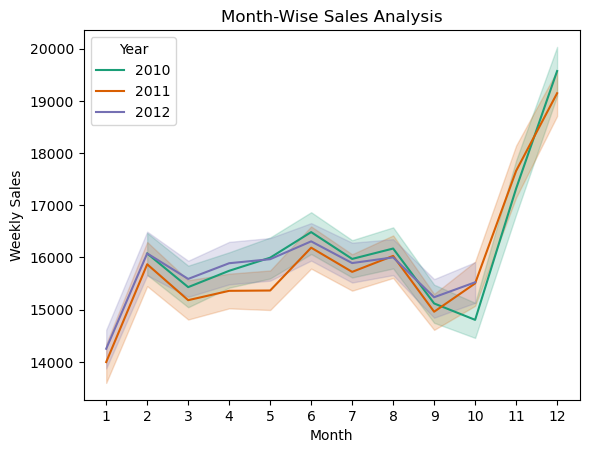

In [29]:
sns.lineplot(x='Month', y = 'Weekly_Sales', data=dateSales, hue='Year', palette='Dark2')
plt.xticks(range(1, 13))
plt.title('Month-Wise Sales Analysis')
plt.ylabel('Weekly Sales')
plt.show()

- Interesting observations: Sales for 2010 starts from February whereas for 2012, end month is November
- Maybe due to festive season, sales in Nov, Dec is more than the average band (15K-16K). On the other hand, sales is really low on January.

In [30]:
#More than half of the rows are null for the Markdown columns
#Since I do not have much information available about these columns, removing these.
#Date column can be removed now.

sales = dateSales.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown4', 'MarkDown5', 'Date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          421570 non-null  int64  
 1   Dept           421570 non-null  int64  
 2   Weekly_Sales   421570 non-null  float64
 3   IsHoliday      421570 non-null  bool   
 4   Temperature    421570 non-null  float64
 5   Fuel_Price     421570 non-null  float64
 6   CPI            421570 non-null  float64
 7   Unemployment   421570 non-null  float64
 8   Type           421570 non-null  object 
 9   Size           421570 non-null  int64  
 10  Year           421570 non-null  int64  
 11  Month          421570 non-null  int64  
 12  Week_of_Month  421570 non-null  UInt32 
dtypes: UInt32(1), bool(1), float64(5), int64(5), object(1)
memory usage: 57.1+ MB


In [31]:
sales.isnull().sum()

Store            0
Dept             0
Weekly_Sales     0
IsHoliday        0
Temperature      0
Fuel_Price       0
CPI              0
Unemployment     0
Type             0
Size             0
Year             0
Month            0
Week_of_Month    0
dtype: int64

In [32]:
sales.sample(10)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week_of_Month
56343,6,81,15091.96,True,48.58,3.409,221.864499,6.132,A,202505,2012,2,2
152230,16,12,3946.80,False,38.64,3.735,192.725201,6.339,B,57197,2011,5,2
86395,9,90,3349.74,False,81.05,3.346,225.549584,5.539,B,125833,2012,6,4
162329,17,23,16689.68,False,56.61,3.704,129.043200,6.774,B,93188,2011,6,3
268310,28,74,14033.93,False,90.84,2.949,126.111903,14.099,A,206302,2010,6,2
138424,15,26,6116.76,False,31.79,2.919,131.735000,8.350,B,123737,2010,3,1
265012,27,32,8549.05,False,62.62,4.170,141.901526,8.253,A,204184,2012,4,4
218231,23,9,86116.34,False,69.83,2.810,132.497600,5.435,B,114533,2010,6,4
208903,22,98,60.25,False,76.35,2.792,136.455402,8.433,B,119557,2010,7,5
31676,4,94,58210.98,False,74.44,2.621,126.089290,7.372,A,205863,2010,8,5


In [33]:
#Lets change IsHoliday -> False (0), True (1)
#Dummies for Type

sales['IsHoliday'] = sales['IsHoliday'].apply(lambda x : 0 if x == False else 1)

In [34]:
initCol = sales['Type']
dummies = pd.get_dummies(initCol, prefix='Type')

In [35]:
walSales = sales.drop(['Type'], axis=1)

In [36]:
totSales = pd.concat([walSales, dummies], axis=1)
totSales.sample(10)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week_of_Month,Type_A,Type_B,Type_C
37128,4,2,101605.74,0,34.19,3.493,130.454621,4.607,205863,2012,2,3,1,0,0
54898,6,67,8958.82,0,78.49,3.467,217.918847,6.925,202505,2011,9,4,1,0,0
189769,20,25,17823.54,0,61.08,2.707,204.885097,7.484,203742,2010,10,1,1,0,0
379064,40,91,40326.23,0,55.30,4.046,137.923067,4.125,155083,2012,4,4,1,0,0
332690,35,10,12968.28,0,70.31,2.755,136.557015,8.861,103681,2010,8,5,0,1,0
206657,21,97,3212.64,1,88.40,3.730,222.074763,6.565,140167,2012,9,2,0,1,0
249315,26,20,3821.55,0,46.81,2.776,132.751667,8.149,152513,2010,10,2,1,0,0
289302,30,97,13078.80,0,61.27,3.065,213.190421,8.028,42988,2011,2,4,0,0,1
2626,1,54,29.08,0,67.18,2.720,211.813744,7.838,151315,2010,10,3,1,0,0
87866,10,46,54203.27,0,55.92,2.877,126.578286,9.765,126512,2010,3,1,0,1,0


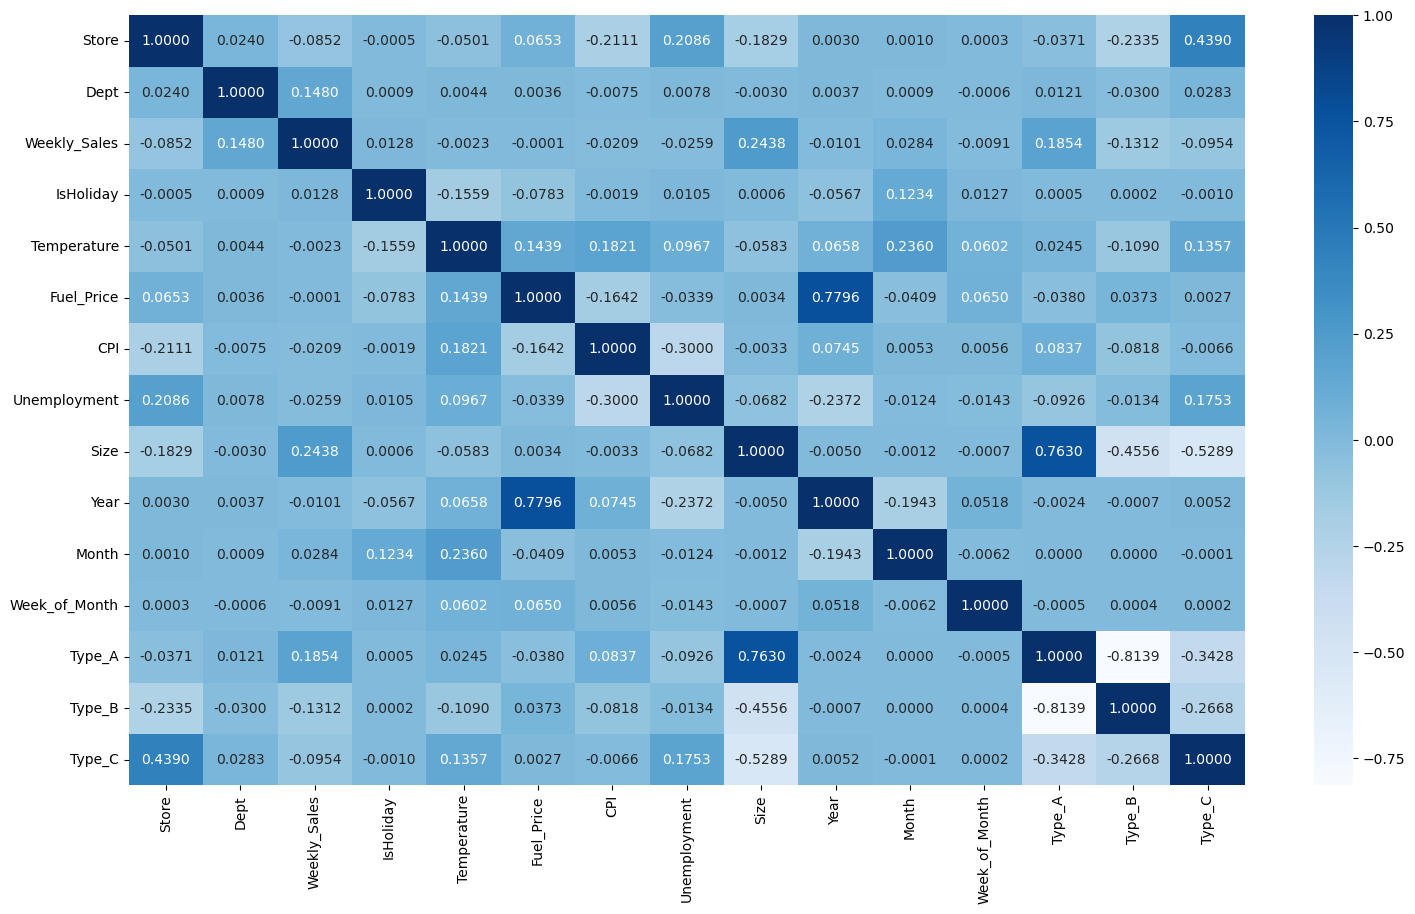

In [37]:
#Lets try to see the inter-dependency among the columns

plt.figure(figsize=(18, 10))

sales_cr = totSales.corr()
sns.heatmap(sales_cr, annot=True, cmap='Blues', fmt = '.4f')
plt.show()

__Observation__

- There is a high negative correlation between Type A & Type B, not sure why though

In [38]:
totSales.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
IsHoliday,421570.0,0.070358,0.255750,0.000,0.000000,0.00000,0.000000,1.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Year,421570.0,2010.968591,0.796876,2010.000,2010.000000,2011.00000,2012.000000,2012.000000


In [39]:
numeric_columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']
category_columns = ['Store', 'Dept', 'IsHoliday', 'Year', 'Month', 'Week_of_Month', 'Type_A', 'Type_B', 'Type_C']

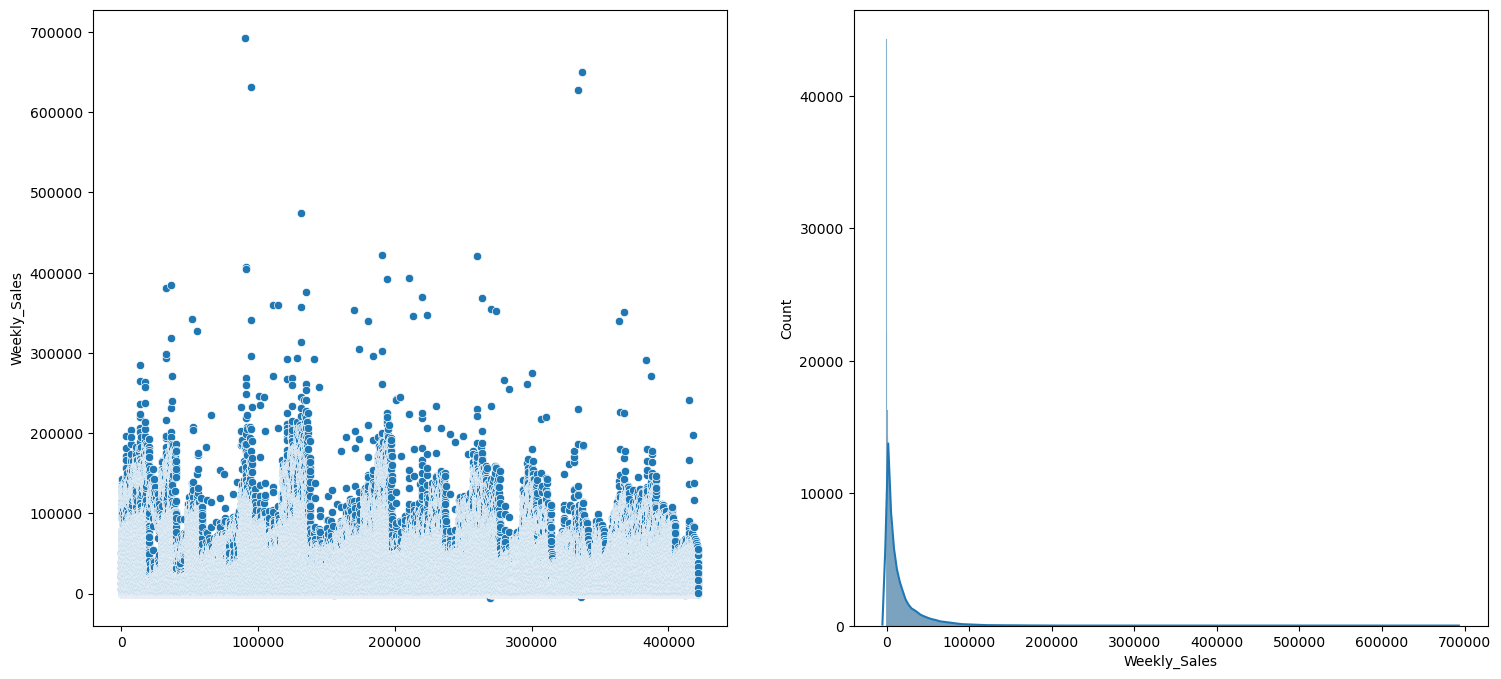

In [40]:
#Plotting the target

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.scatterplot(y='Weekly_Sales', x = totSales.index, data=totSales, ax = ax[0])
sns.histplot(x = 'Weekly_Sales', data=totSales, kde=True, ax = ax[1])
fig.show()

***There are peaks observed at certain levels, overall distribution is right tailed***

In [41]:
#Creating functions to plot the numeric and categorical variables and analyze

def dist_plot(df, columns, kind='scatter', label = 'Weekly_Sales', basis = None):
    plt.figure(figsize=(18, 10))
    
    for idx, column in enumerate(columns):
        f = plt.subplot(3, 3, idx + 1)
        
        if kind == 'scatter':
            g = sns.scatterplot(x =  column, y = label, data = df, hue = basis)
        elif (kind == 'histplot'):
            g = sns.histplot(x = column, data = df, kde = True, hue = basis)
        elif (kind == 'boxplot'):
            g = sns.boxplot(x = column, data = df, hue = basis)
            
    plt.tight_layout()
    
    
def cat_plot(df, columns, kind='countplot', label='Weekly_Sales', basis = None):
    plt.figure(figsize=(18, 10))
    
    for idx, column in enumerate(columns):
        f = plt.subplot(3, 3, idx + 1)
        
        if kind == 'countplot':
            g = sns.countplot(x = column, data=df, hue=basis)
            
        if kind == 'barplot':
            g = sns.barplot(x = column, y = label, data=df, hue=basis)
            
    plt.tight_layout()

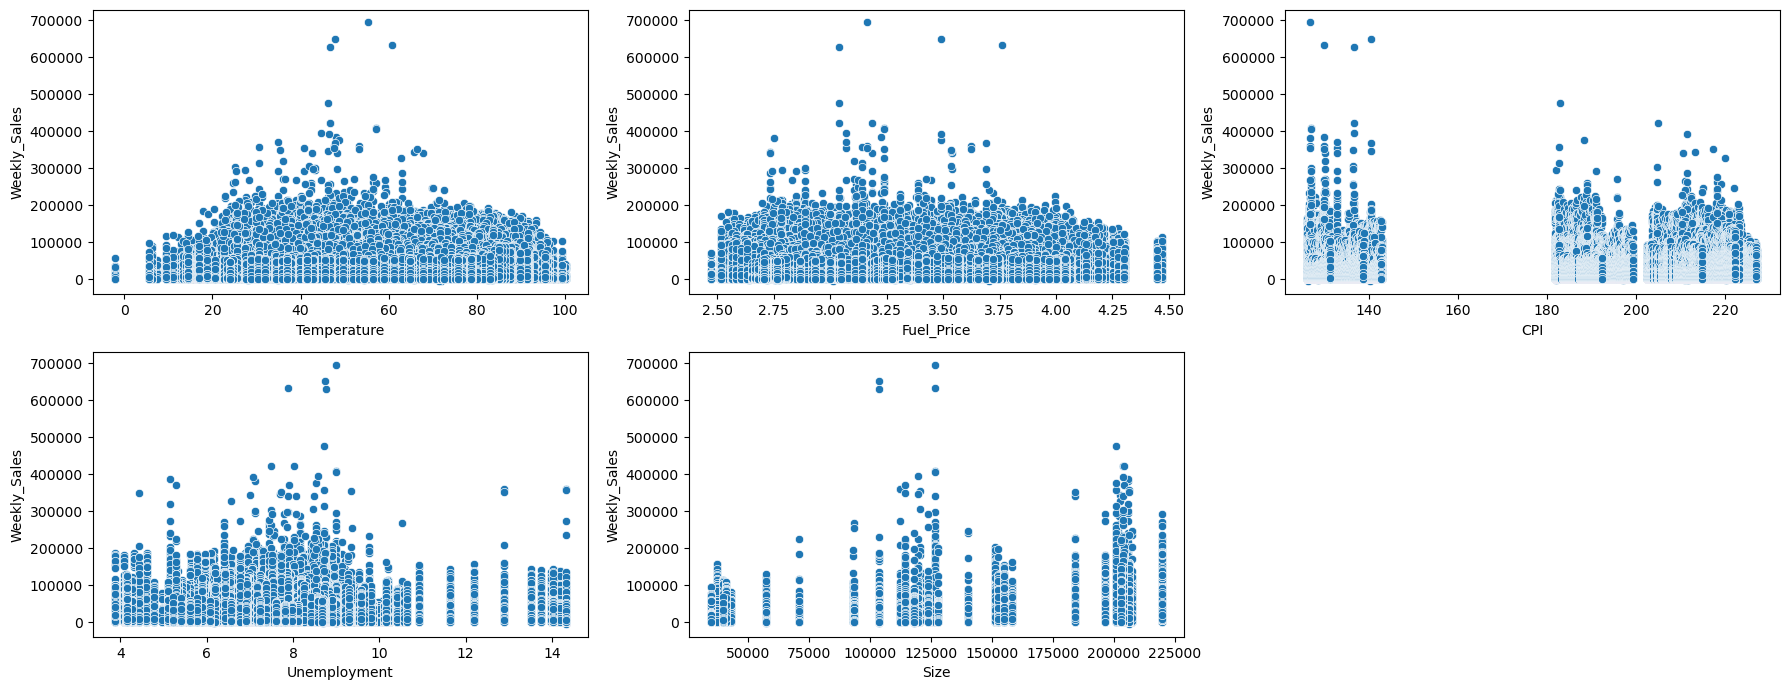

In [42]:
dist_plot(totSales, numeric_columns)

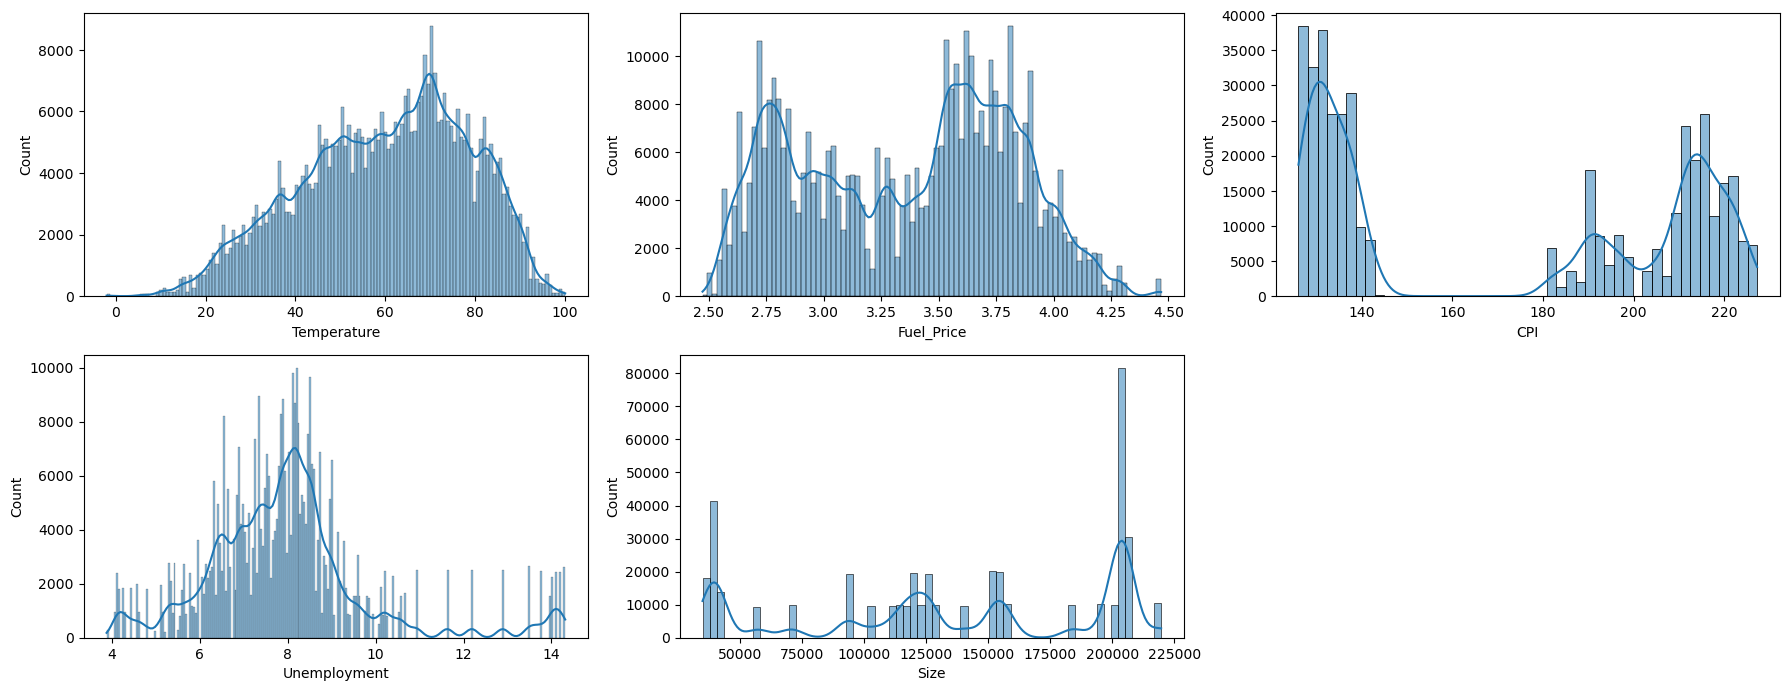

In [43]:
dist_plot(totSales, numeric_columns, kind='histplot')

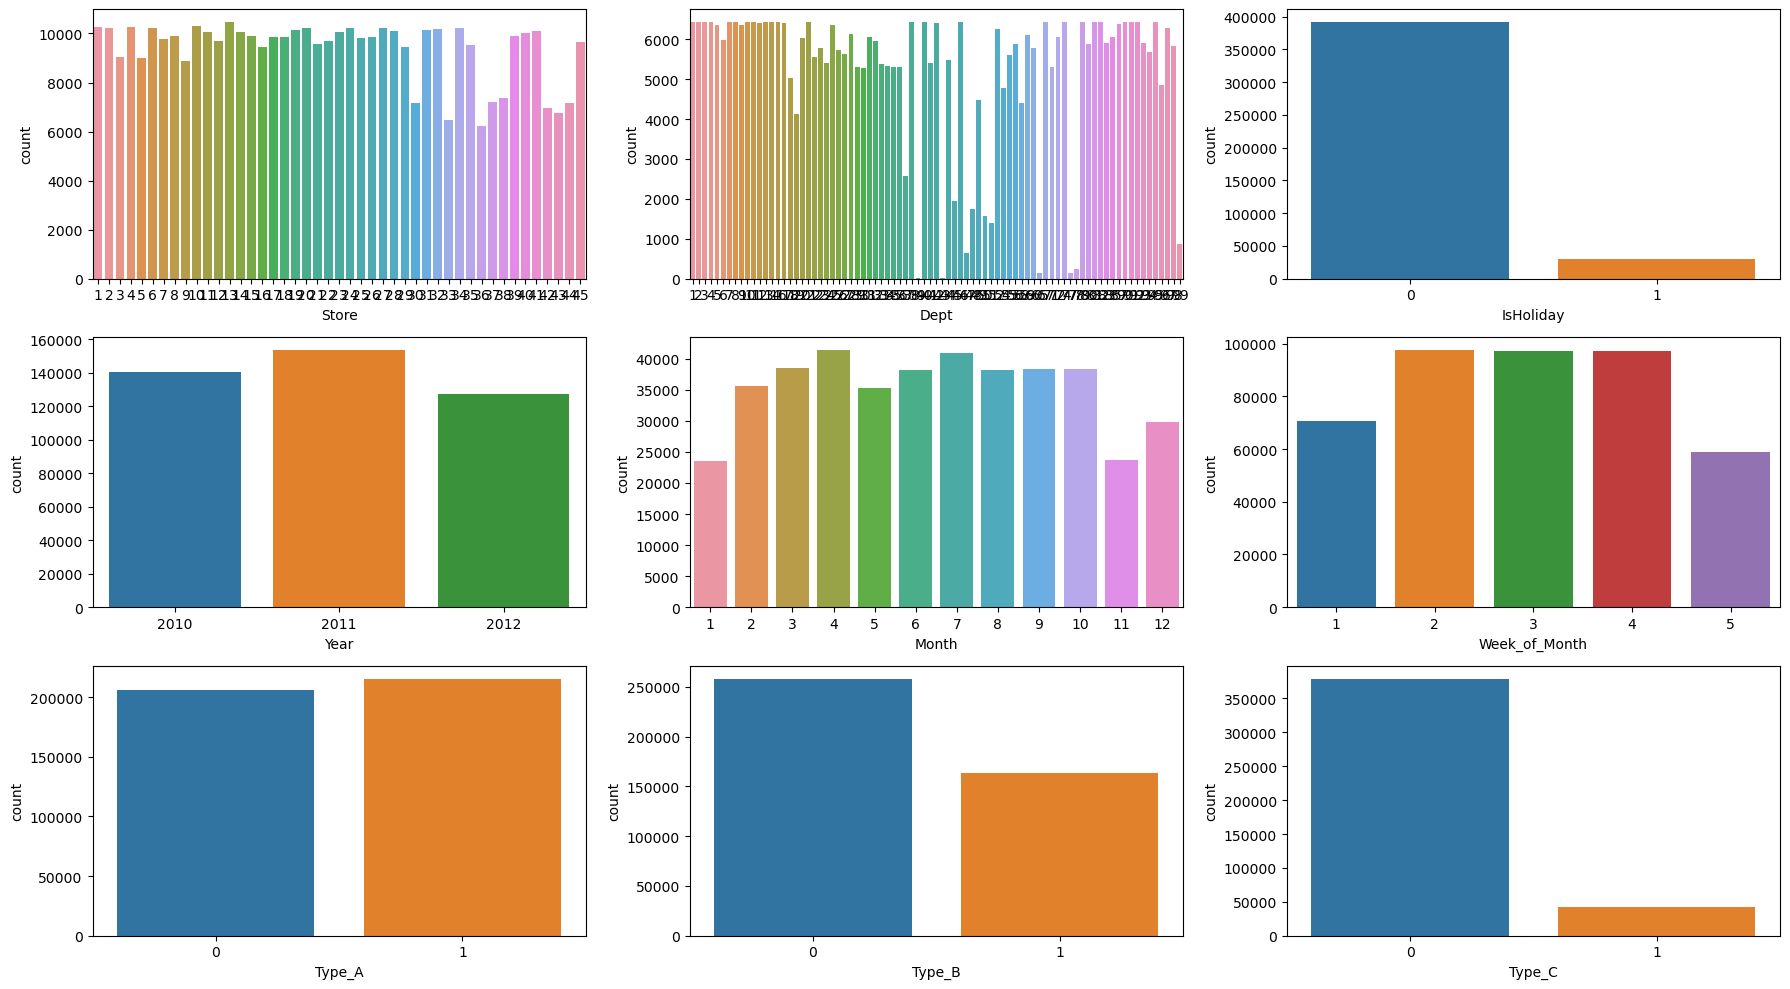

In [44]:
cat_plot(totSales, category_columns)

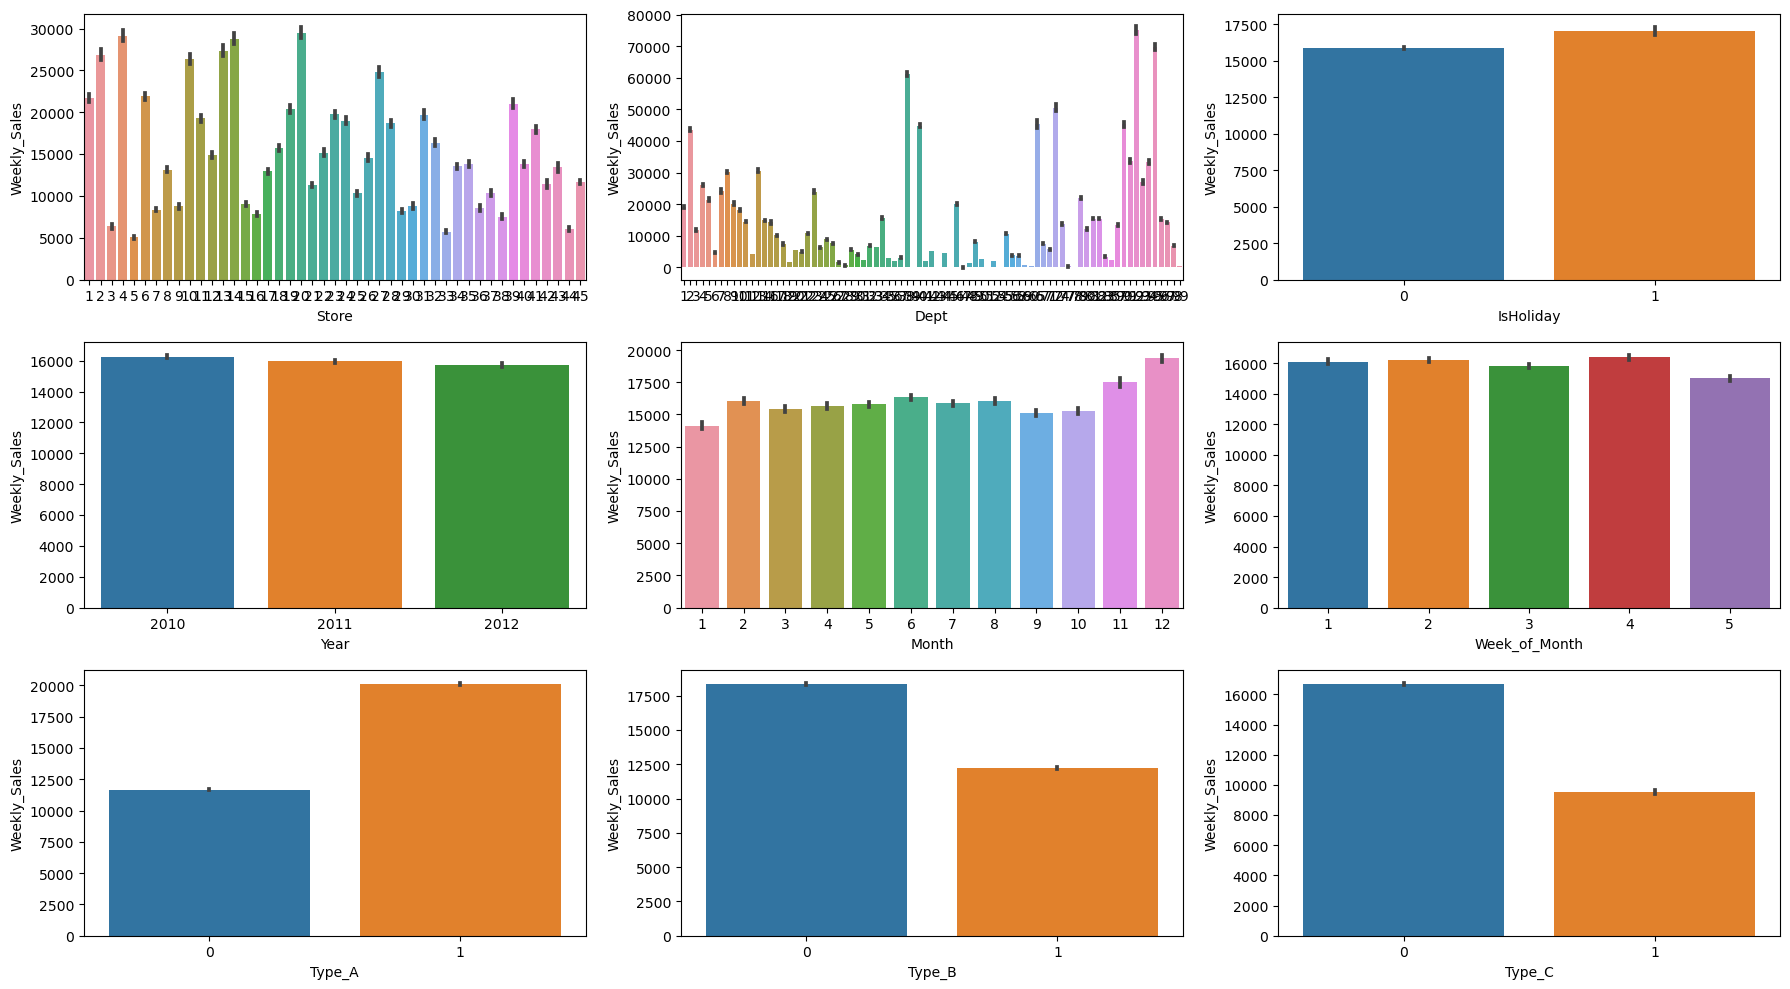

In [45]:
cat_plot(totSales, category_columns, kind='barplot')

***Observations***

*Numeric Columns*

- Outliers exist, will treat acordingly.
- Maybe CPI should be considered as category with High >160 and low <160.
- Looking at the sizes column, it seems to be more scattered and sales took places for specific sizes. Instead of whole numbers, can we use the probablity here?

*Category Columns*

- Similar to sizes, lets calculate proba for departments and store
- Number of holidays are less which is natural but the sales goes up significantly on holidays. Can we do something there? Stratified Sampling?

In [46]:
#Analyzing CPI

cpi = totSales.copy()
cpi['CPI_Level'] = totSales['CPI'].apply(lambda x : 1 if x >=160 else 0)
cpi.sample(10)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week_of_Month,Type_A,Type_B,Type_C,CPI_Level
107565,11,19,1519.27,0,77.67,3.666,226.518093,6.334,207499,2012,9,5,1,0,0,1
389283,41,17,10494.46,0,50.22,3.870,197.548161,6.547,196321,2012,5,2,1,0,0,1
47316,5,14,4547.26,0,70.45,3.630,222.330443,5.801,34875,2012,5,3,0,1,0,1
20486,3,5,15051.48,0,45.71,2.572,214.424881,7.368,37392,2010,2,1,0,1,0,1
322263,34,5,14069.03,0,79.58,2.612,126.128355,9.816,158114,2010,7,4,1,0,0,0
384646,41,67,9562.16,0,14.56,3.011,191.762589,7.241,196321,2011,2,1,1,0,0,1
144095,15,33,3062.84,0,64.87,3.858,136.419500,7.806,123737,2011,9,5,0,1,0,0
300984,31,44,1776.06,0,52.21,3.268,219.625842,7.057,203750,2012,1,4,1,0,0,1
333689,35,13,31022.47,0,30.83,3.109,136.525571,8.763,103681,2010,12,2,0,1,0,0
371065,40,46,9592.26,1,20.84,2.771,131.586613,5.892,155083,2010,2,2,1,0,0,0


***CPI can be converted to a category***

In [47]:
#Analyzing Size

totSales['Size'].value_counts(normalize=True)

39690     0.049344
39910     0.048858
203819    0.048334
219622    0.024845
126512    0.024468
205863    0.024366
151315    0.024300
202307    0.024285
204184    0.024255
158114    0.024252
203742    0.024228
202505    0.024221
203007    0.024200
203750    0.024058
206302    0.023989
196321    0.023930
207499    0.023868
114533    0.023839
200898    0.023816
155083    0.023761
123737    0.023486
155078    0.023472
184109    0.023431
93188     0.023398
120653    0.023386
152513    0.023375
128107    0.023256
70713     0.023156
112238    0.023021
119557    0.022981
118221    0.022860
140167    0.022729
103681    0.022601
93638     0.022428
57197     0.022400
37392     0.021434
34875     0.021346
125833    0.021033
42988     0.016975
41062     0.016014
Name: Size, dtype: float64

In [48]:
d = dict(totSales['Size'].value_counts(normalize=True))

In [49]:
sizes = totSales.copy()
sizes['Size_Proba'] = sizes['Size'].apply(lambda x : round(d[x], 5))
sizes.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week_of_Month,Type_A,Type_B,Type_C,Size_Proba
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,151315,2010,2,1,1,0,0,0.0243
1,1,2,50605.27,0,42.31,2.572,211.096358,8.106,151315,2010,2,1,1,0,0,0.0243
2,1,3,13740.12,0,42.31,2.572,211.096358,8.106,151315,2010,2,1,1,0,0,0.0243
3,1,4,39954.04,0,42.31,2.572,211.096358,8.106,151315,2010,2,1,1,0,0,0.0243
4,1,5,32229.38,0,42.31,2.572,211.096358,8.106,151315,2010,2,1,1,0,0,0.0243


***Sizes can be showed as probabilities, lets do same for Dept and Store***

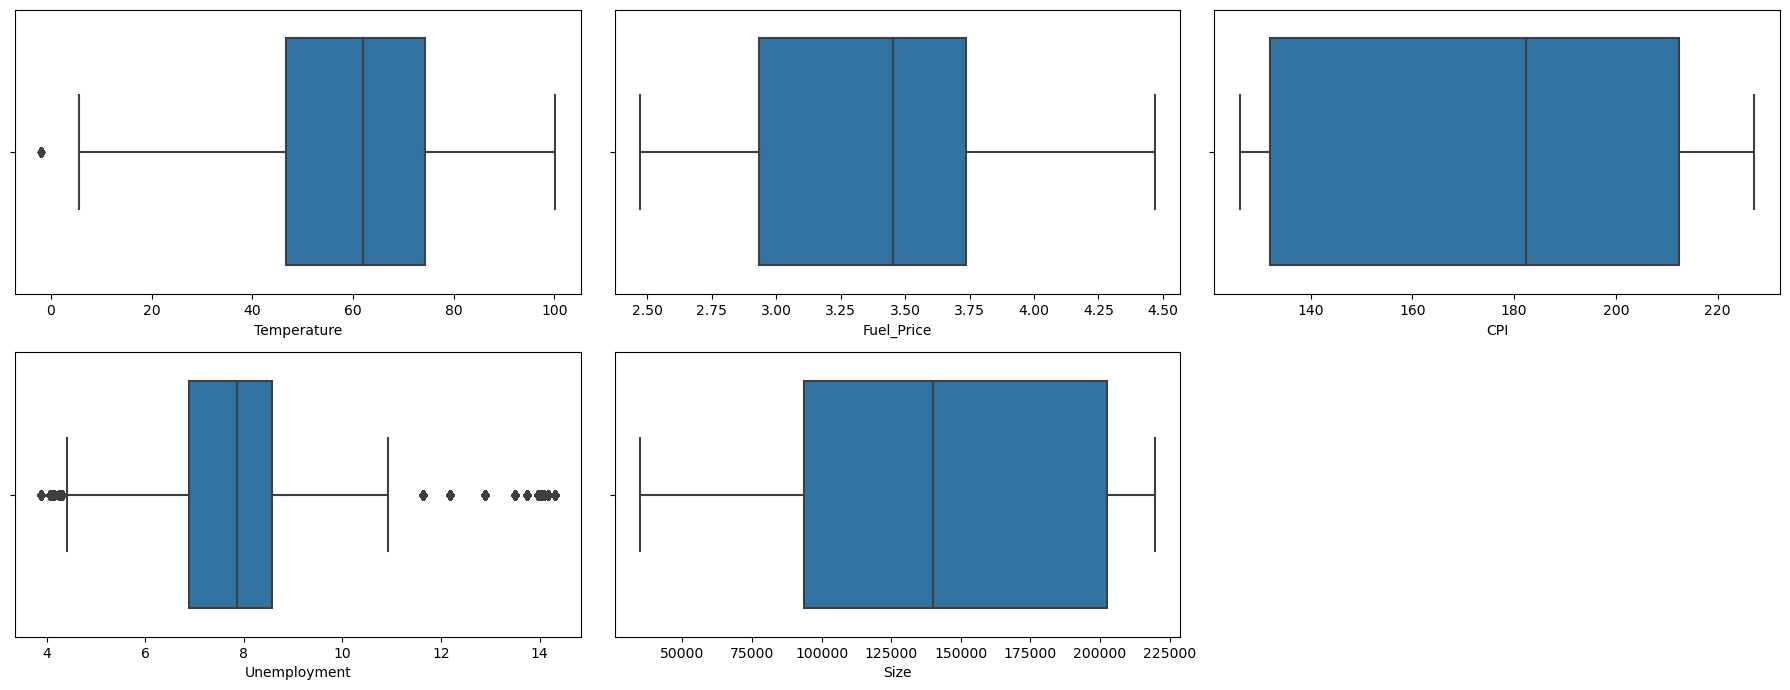

In [50]:
#Create box plots for numeric features

dist_plot(totSales, numeric_columns, kind='boxplot')

In [51]:
totSales.head(8)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week_of_Month,Type_A,Type_B,Type_C
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,151315,2010,2,1,1,0,0
1,1,2,50605.27,0,42.31,2.572,211.096358,8.106,151315,2010,2,1,1,0,0
2,1,3,13740.12,0,42.31,2.572,211.096358,8.106,151315,2010,2,1,1,0,0
3,1,4,39954.04,0,42.31,2.572,211.096358,8.106,151315,2010,2,1,1,0,0
4,1,5,32229.38,0,42.31,2.572,211.096358,8.106,151315,2010,2,1,1,0,0
5,1,6,5749.03,0,42.31,2.572,211.096358,8.106,151315,2010,2,1,1,0,0
6,1,7,21084.08,0,42.31,2.572,211.096358,8.106,151315,2010,2,1,1,0,0
7,1,8,40129.01,0,42.31,2.572,211.096358,8.106,151315,2010,2,1,1,0,0


# 3. Data Pipeline Creation

__TO DOs__

- Treat Outliers
- Dates: Create new columns - 'Month', 'Year', and remove 'Date' #Not creating 'week of the month' column as dont see much need for it.
- Hot Encoding: 'IsHolidays', 'Type', 'Year'
- Trans Columns: 'CPI', 'Store', 'Dept', 'Size'
- Remove Columns: All Markdown
- Numeric Columns: 'Temperature', 'Fuel_Price', 'Unemployment'

In [52]:
#Need to put everything into perspective and hence will start from the merged version
#We have pickle file ready for the merge.
#Once we get the test data, we can merge it and put into data pipeline directly

mergedSales.head(8)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
6,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
7,1,8,2010-02-05,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [53]:
#Lets treat outliers now

def treat_outliers(df, columns):
    dff = df.copy()
    dff[columns] = df[columns].fillna(0)
    
    for column in columns:
        Q1 = np.percentile(dff[column], 25.)
        Q2 = np.percentile(dff[column], 50.)
        Q3 = np.percentile(dff[column], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        
        dff.loc[dff[column]> upper, column] = upper
        dff.loc[dff[column]< lower, column] = lower
        
    return dff

In [54]:
num_cols = ['Temperature', 'Fuel_Price', 'Unemployment', 'Size']

sales_out = treat_outliers(mergedSales, num_cols)

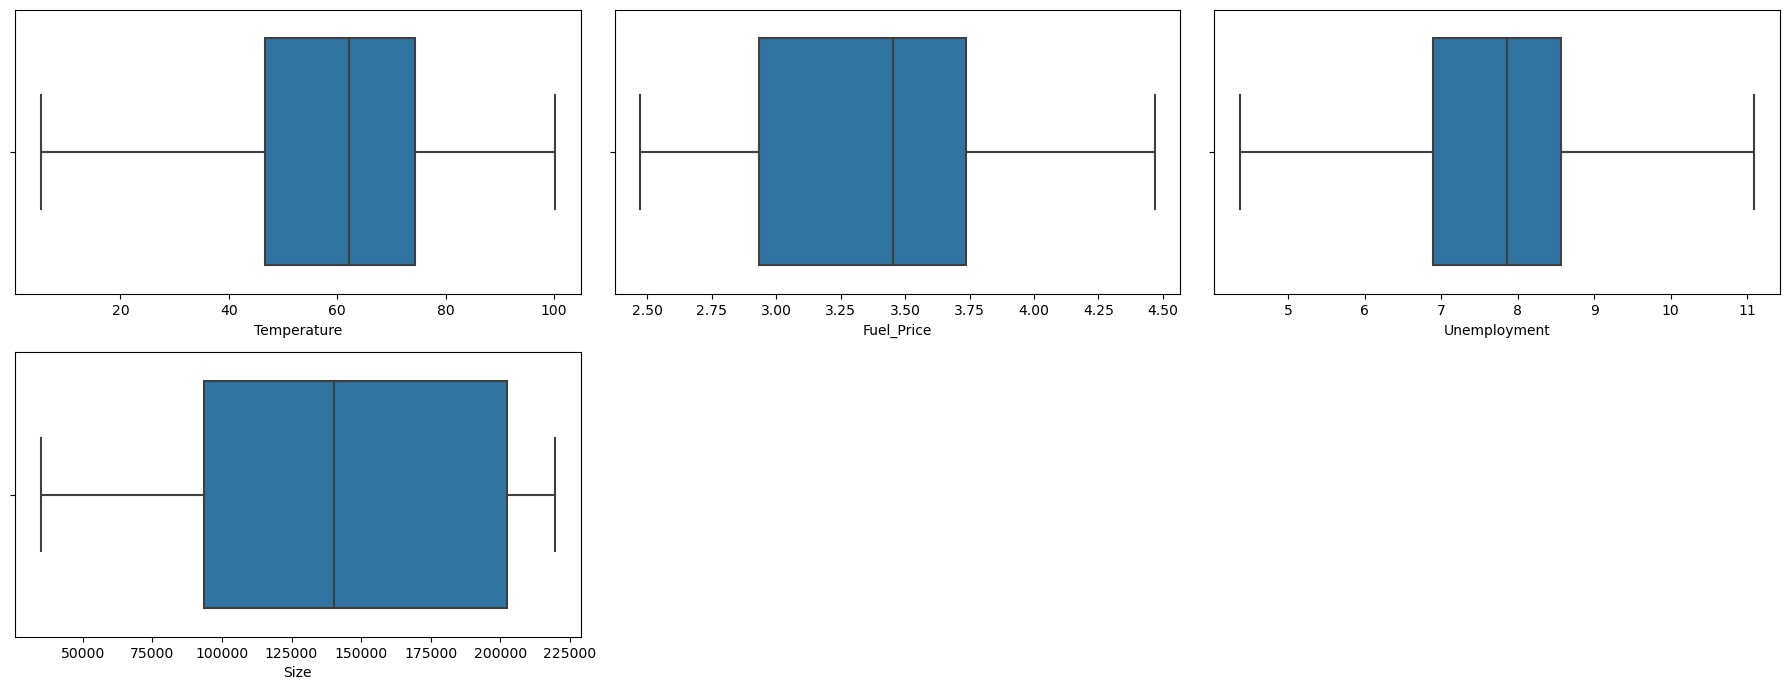

In [55]:
dist_plot(sales_out, num_cols, kind='boxplot')

In [56]:
#sales_out does not have outliers but can we do a little closure view for holidays

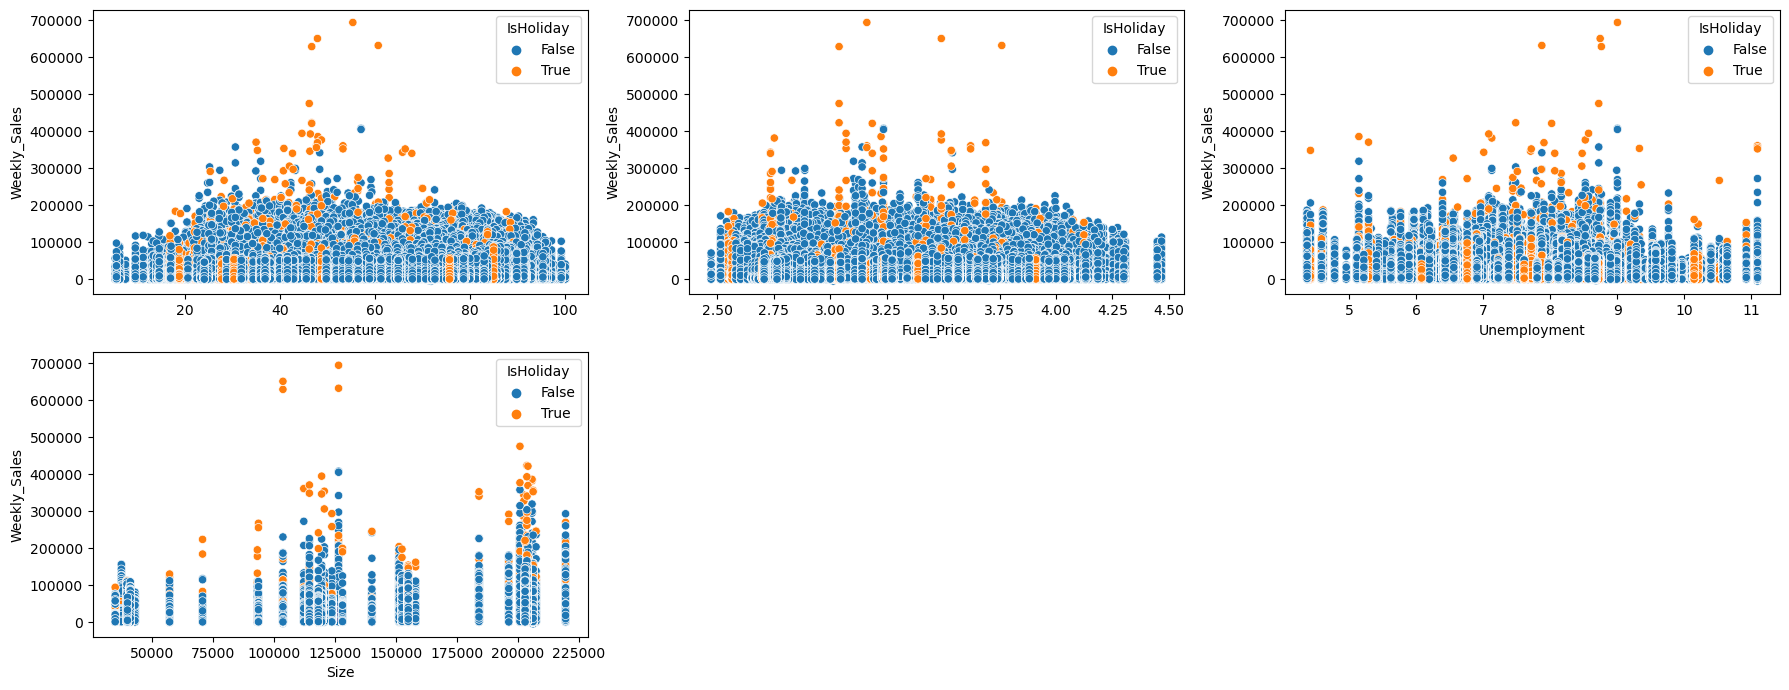

In [57]:
dist_plot(sales_out, num_cols, basis='IsHoliday')

- As presumed, high volume of sales is observed on holidays

In [58]:
X_sales = sales_out.drop(['Weekly_Sales'], axis=1)
y = sales_out['Weekly_Sales']

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [60]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

***Feature Transformation Step***

- Create new columns 'Year', 'Month', 'Week_of_Month'
- Create hot encoding for Year
- Remove Date column
- Create Dummies for Type, IsHoliday
- Create new column 'CPI_LeveL' with categories: 0 (CPI <160) & 1 (CPI >160)
- Create new column 'Size_Proba' with probabilities for each size
- Create new column 'Dept_Proba' for the probabilities.
- Create new column 'Store_Level' for the probabilities.
- Remove columns 'CPI', 'Size', 'Dept', 'Store', 'MarkDown cols'

In [61]:
date_cols = ['Date']
num_cols = ['Temperature', 'Fuel_Price', 'Unemployment']
dummy_cols = ['Type', 'IsHoliday']
trans_cols = ['CPI', 'Size', 'Dept', 'Store', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

In [62]:
class DateTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cols_to_remove = ['Date']
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        cols_rem = self.cols_to_remove.copy()
        df = X[cols_rem]
        
        df['Year'] = df['Date'].astype('datetime64').dt.year
        df['Month'] = df['Date'].astype('datetime64').dt.month
        
        d = dict(df['Year'].value_counts(normalize=True))
        df['Year_Proba'] = df['Year'].apply(lambda x : round(d[x], 5))
        
        cols_rem.append('Year')
        
        X_trans = df.drop(columns = cols_rem, axis=1)
        return X_trans.to_numpy()

In [63]:
dateTrans = DateTransformer()
dateTrans.transform(X_sales)

array([[ 2.     ,  0.3337 ],
       [ 2.     ,  0.3337 ],
       [ 2.     ,  0.3337 ],
       ...,
       [10.     ,  0.30229],
       [10.     ,  0.30229],
       [10.     ,  0.30229]])

In [64]:
class FeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cols_to_remove = ['CPI', 'Size', 'Dept', 'Store', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        cols_rem = self.cols_to_remove
        df = X[cols_rem].copy()
        for col in cols_rem:
            if col == 'CPI':
                df['CPI_Level'] = df['CPI'].apply(lambda x : 1 if x >=160 else 0)
            if col == 'Size':
                d = dict(df['Size'].value_counts(normalize=True))
                df['Size_Proba'] = df['Size'].apply(lambda x : round(d[x], 5))
            if col == 'Dept':
                d = dict(df['Dept'].value_counts(normalize=True))
                df['Dept_Proba'] = df['Dept'].apply(lambda x : round(d[x], 5))
            if col == 'Store':
                d = dict(df['Store'].value_counts(normalize=True))
                df['Store_Proba'] = df['Store'].apply(lambda x : round(d[x], 5))
        X_trans = df.drop(columns = cols_rem, axis=1)
        return X_trans.to_numpy()

In [65]:
transformer = FeatureTransformer()
transformer.transform(X_sales)

array([[1.     , 0.0243 , 0.01526, 0.0243 ],
       [1.     , 0.0243 , 0.01526, 0.0243 ],
       [1.     , 0.0243 , 0.01526, 0.0243 ],
       ...,
       [1.     , 0.02286, 0.01526, 0.02286],
       [1.     , 0.02286, 0.01489, 0.02286],
       [1.     , 0.02286, 0.01384, 0.02286]])

In [66]:
date_imp = SimpleImputer(strategy='most_frequent')
num_imp = SimpleImputer(strategy='median')
cat_imp = SimpleImputer(strategy='most_frequent')
trans_imp = SimpleImputer(strategy='most_frequent')

In [67]:
encoder = OneHotEncoder(dtype='int')

In [68]:
date_pipeline = Pipeline([('dateTransformer', DateTransformer()),
                          ('date_imp', SimpleImputer(strategy='most_frequent'))])

In [69]:
num_pipeline = Pipeline([('num_imp', SimpleImputer(strategy='median'))])

In [70]:
cat_pipeline = Pipeline([('cat_imp', SimpleImputer(strategy='most_frequent')),
                        ('encoder', OneHotEncoder(dtype='int'))])

In [71]:
# trans_pipeline = Pipeline([('trans_imp', SimpleImputer(strategy='most_frequent')),
#                           ('transformer', FeatureTransformer())])

In [72]:
#trans_pipeline = Pipeline([('transformer', FeatureTransformer())])

In [73]:
trans_pipeline = Pipeline([('transformer', FeatureTransformer()), 
                          ('trans_imp', SimpleImputer(strategy='most_frequent'))])

In [74]:
data_pipeline = ColumnTransformer([('date', date_pipeline, date_cols),
                                   ('num', num_pipeline, num_cols),
                                  ('cat', cat_pipeline, dummy_cols),
                                  ('trans', trans_pipeline, trans_cols)])

data_pipeline

ColumnTransformer(transformers=[('date',
                                 Pipeline(steps=[('dateTransformer',
                                                  DateTransformer()),
                                                 ('date_imp',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Date']),
                                ('num',
                                 Pipeline(steps=[('num_imp',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Temperature', 'Fuel_Price', 'Unemployment']),
                                ('cat',
                                 Pipeline(steps=[('cat_imp',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(dtype='int'))]),
                

In [75]:
X_sales_prepared = data_pipeline.fit_transform(X_sales)

X_sales_prepared

array([[2.0000e+00, 3.3370e-01, 4.2310e+01, ..., 2.4300e-02, 1.5260e-02,
        2.4300e-02],
       [2.0000e+00, 3.3370e-01, 4.2310e+01, ..., 2.4300e-02, 1.5260e-02,
        2.4300e-02],
       [2.0000e+00, 3.3370e-01, 4.2310e+01, ..., 2.4300e-02, 1.5260e-02,
        2.4300e-02],
       ...,
       [1.0000e+01, 3.0229e-01, 5.8850e+01, ..., 2.2860e-02, 1.5260e-02,
        2.2860e-02],
       [1.0000e+01, 3.0229e-01, 5.8850e+01, ..., 2.2860e-02, 1.4890e-02,
        2.2860e-02],
       [1.0000e+01, 3.0229e-01, 5.8850e+01, ..., 2.2860e-02, 1.3840e-02,
        2.2860e-02]])

In [76]:
#Lets pickle the data_pipeline for future reference if any

joblib.dump(data_pipeline, 'data_pipeline_V2.pkl')

['data_pipeline_V2.pkl']

# 4. Building The Model

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [78]:
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [80]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [81]:
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
def get_modelList():
    
    model_list = []
    
    model_list.append(LinearRegression())
    model_list.append(HistGradientBoostingRegressor())
    #model_list.append(RandomForestRegressor())
    #model_list.append(KNeighborsRegressor())
    #model_list.append(SVR())
    #model_list.append(DecisionTreeRegressor())
    
    return model_list

In [83]:
def score_matrix(X, y, modelList, scale=None):
    start = time.time()
    
    mtx_cols = ['Model', 'RMSE', 'R2 Score', 'Elapsed']
    estimator = []
    rmse = []
    r2 = []
    elapsed = []
    
    if scale == 'MinMax':
        scale = MinMaxScaler()
        X = scale.fit_transform(X)
        
    if scale == 'Standard':
        scale = StandardScaler()
        X = scale.fit_transform(X)
    
    for model in modelList:
        #kfold = StratifiedKFold(shuffle=True, random_state=42)
        kfold = KFold(shuffle=True, random_state=42, n_splits=5)
        
        cv_rmse = cross_val_score(model, X, y, cv=kfold, scoring='neg_root_mean_squared_error', error_score='raise')
        cv_r2 = cross_val_score(model, X, y, cv=kfold, scoring='r2', error_score='raise')
        
        rmse.append(round(-np.mean(cv_rmse), 4))
        r2.append(round(np.mean(cv_r2), 4))
        
        estimator.append(model.__class__.__name__)
        exe = time.time() - start
        elapsed.append(round(exe, 4))
        
    mtx = list(zip(estimator, rmse, r2, elapsed))
    df = pd.DataFrame(mtx, columns = mtx_cols)
    return df

In [84]:
models = get_modelList()

print(models)

[LinearRegression(), HistGradientBoostingRegressor()]


***Model scores without scaling***

In [85]:
score_matrix(X_sales_prepared, y, models)

,Model,RMSE,R2 Score,Elapsed
0,LinearRegression,21023.5635,0.1430,2.6447
1,HistGradientBoostingRegressor,15429.5672,0.5389,81.0684


***Model with Scaling***

In [86]:
score_matrix(X_sales_prepared, y, models, scale = 'MinMax')

,Model,RMSE,R2 Score,Elapsed
0,LinearRegression,21023.5701,0.1430,2.7941
1,HistGradientBoostingRegressor,15419.9473,0.5387,80.9983


In [87]:
score_matrix(X_sales_prepared, y, models, scale = 'Standard')

,Model,RMSE,R2 Score,Elapsed
0,LinearRegression,21023.5633,0.1430,2.7177
1,HistGradientBoostingRegressor,15431.9768,0.5382,81.4645


In [88]:
#Considering less RMSE, lets choose MinMax

scale = MinMaxScaler()
X_scaled = scale.fit_transform(X_sales_prepared)

In [96]:
param_grid = {
    'loss': ['squared_error', 'absolute_error', 'poisson'],
    'learning_rate': [0.1, 0.2, 0.4, 0.5],
    'max_iter': [80, 100, 200, 400],
}

hgb = HistGradientBoostingRegressor(random_state=42)

In [97]:
grid = GridSearchCV(hgb, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_scaled, y)
best_estimator = grid.best_estimator_
print(best_estimator)

HistGradientBoostingRegressor(learning_rate=0.2, max_iter=80, random_state=42)


In [98]:
def get_scores(model, X, y):
    
    kfold = KFold(shuffle=True, random_state=42, n_splits=5)
    y_pred = cross_val_predict(model, X, y, cv=kfold)
    
    rmse = round(np.sqrt(mean_squared_error(y, y_pred)), 4)
    
    return rmse

In [99]:
get_scores(best_estimator, X_scaled, y)

15321.6316

In [96]:
# vr = VotingRegressor([('LR', LinearRegression()),
#                       ('GB', HistGradientBoostingRegressor()),
#                       ('SV', SVR())])

# br = BaggingRegressor([('LR', LinearRegression(),
#                       ('GB', HistGradientBoostingRegressor()),
#                       ('SV', SVR()))])

# sr = StackingRegressor([('LR', LinearRegression(),
#                       ('GB', HistGradientBoostingRegressor()),
#                       ('SV', SVR()))])


In [97]:
# print(get_scores(vr, X_scaled, y))
# print(get_scores(br, X_scaled, y))
# print(get_scores(sr, X_scaled, y))

In [98]:
#Not checking ensemble techniques sur to system constraints

# 5. Model Implementation

In [99]:
#So the using best estimator and scaling, lets create the final pipeline

In [100]:
final_pipeline = Pipeline([('preproc', data_pipeline),
                          ('scale', MinMaxScaler()),
                          ('hgb', HistGradientBoostingRegressor(max_iter=400, random_state=42))])

final_pipeline

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('date',
                                                  Pipeline(steps=[('dateTransformer',
                                                                   DateTransformer()),
                                                                  ('date_imp',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Date']),
                                                 ('num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Temperature', 'Fuel_Price',
                                                   'Unemployment']),
                                                 ('cat',
                                             

In [101]:
final_pipeline.fit(X_sales, y)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('date',
                                                  Pipeline(steps=[('dateTransformer',
                                                                   DateTransformer()),
                                                                  ('date_imp',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Date']),
                                                 ('num',
                                                  Pipeline(steps=[('num_imp',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Temperature', 'Fuel_Price',
                                                   'Unemployment']),
                                                 ('cat',
                                             

In [102]:
md = DataMerger(FEATURE_PATH, STORES_PATH)
X_test = md.transform(test)

In [103]:
X_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221


In [104]:
joblib.dump(final_pipeline, 'final_pipeline_V1.0.pkl')

['final_pipeline_V1.0.pkl']

In [105]:
predictions = final_pipeline.predict(X_test)

In [106]:
predictions

array([17092.08909361, 17092.08909361, 17092.08909361, ...,
       15619.11041559,  6099.71397632,  4638.39640533])